## Code Created to Perform Lightcurve and Exoplanet Analysis:
#####  Note:
- Final report can be found below
- Additional code can be found in mytools.py and mytools2.py

A) Imported Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from astropy.io import fits #used to open fits files where data is stored
import glob

from scipy.optimize import curve_fit
from scipy.signal import find_peaks #peak finding function

import mytools #.py file that holds functions to run calculation and data science techniques
import mytools2 #.py file that hold functions to perfom plots for report
mykepler = '4'

B) Normalising the Kepler-4 Object Lightcurve 

In [2]:
time = []
flux = []
error = []

#for loop to open all lightcurve, apply normalisation and extend to a new array.
for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    lc = fits.open(lcfile)
    
    #Normalising each lightcurve with specific settings
    lc_norm=mytools.norm(lc[1].data['PDCSAP_FLUX'], lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX_ERR'],1, 1001, 0)
    
    #append data
    time.extend(lc_norm[0])
    flux.extend(lc_norm[1])
    error.extend(lc_norm[2])

#sorting data in chronological order
np_time = np.asarray(time)
np_flux = np.asarray(flux)
np_error = np.asarray(error)
time_sort=np_time[np.argsort(np_time)]
flux_sort=np_flux[np.argsort(np_time)]
error_sort= np_error[np.argsort(np_time)]

C) Lightcurve Folding and Curvefitting using Quadratic Function for Estimated Periods

In [3]:
#Code performs 1) lightcurve folding, 2) lightcurve fitting using quadratic function
#calls in the following functions: mytools.fold_lc, mytools2.quartic_transit, curve_fit.

#---------------------
#Planet F: 13.175 days
#1. Fold Lightcurve
phase_f, flux_f, error_f= mytools.fold_lc(time, flux, error, 13.175)

#2.Mask data for the transit only
mask_f= (0.93>phase_f) & (phase_f>0.88)
ph_f=phase_f[mask_f]
er_f=error_f[mask_f]
fl_f=flux_f[mask_f]

#3.Run Lightcurve fitting
para_f, para_err_f=curve_fit(mytools2.quartic_transit, ph_f, fl_f, p0=[1e6,0.905,-0.0005,1], sigma=er_f)
func_f = mytools2.quartic_transit(ph_f, para_f[0],para_f[1],para_f[2], para_f[3])

#4.Output Transit Depth and Location
depth_f=para_f[2]
loc_f=para_f[1]

#---------------------
#Planet E: 21.776 days
#1. Fold Lightcurve
phase_e, flux_e, error_e= mytools.fold_lc(time, flux, error, 21.776)

#2.Mask data for the transit only
mask_e= (0.720>phase_e) & (phase_e>0.695)
ph_e=phase_e[mask_e]
er_e=error_e[mask_e]
fl_e=flux_e[mask_e]

#3.Run Lightcurve fitting
para_e, para_err_e=curve_fit(mytools2.quartic_transit, ph_e, fl_e, p0=[1e6,0.7075,-0.001,1], sigma=er_e)
func_e = mytools2.quartic_transit(ph_e, para_e[0],para_e[1],para_e[2], para_e[3])

#4.Output transit depth and location
depth_e=para_e[2]
loc_e=para_e[1]

#---------------------
#Planet L: 31.784 days
#1. Fold Lightcurve
phase_l, flux_l, error_l= mytools.fold_lc(time, flux, error, 31.784)

#2.Mask data for the transit only
mask_l= (0.29>phase_l) & (phase_l>0.26)
ph_l=phase_l[mask_l]
er_l=error_l[mask_l]
fl_l=flux_l[mask_l]

#3.Run Lightcurve fitting
para_l, para_err_l=curve_fit(mytools2.quartic_transit, ph_l, fl_l, p0=[1e6,0.275,-0.001,1], sigma=er_l)
func_l = mytools2.quartic_transit(ph_l, para_l[0],para_l[1],para_l[2], para_l[3])

#4.Output Transit Depth and Location
depth_l=para_l[2]
loc_l=para_l[1]

#---------------------
#Planet S: 41.023 days
#1. Fold Lightcurve
phase_s, flux_s, error_s= mytools.fold_lc(time, flux, error, 41.023)

#2.Mask data for the transit only
mask_s= (0.23>phase_s) & (phase_s>0.19)
ph_s=phase_s[mask_s]
er_s=error_s[mask_s]
fl_s=flux_s[mask_s]

#3.Run Lightcurve Fitting
para_s, para_err_s=curve_fit(mytools2.quartic_transit, ph_s, fl_s, p0=[1e6,0.207,-0.001,1], sigma=er_s)
func_s = mytools2.quartic_transit(ph_s, para_s[0],para_s[1],para_s[2], para_s[3])

#4.Output Transit Depth and Location
depth_s=para_s[2]
loc_s=para_s[1]

D) Additional Calculations to Determine Exoplanet Properties

_i) Defining Constants_

In [4]:
star_mass = 1.1 #[M_sun]
star_temp = 5904.0 #[K]
star_temp_err = 78.0 #[K]
star_lum = 0.507 #[L_sun]
star_lum_err = 0.02 #[L_sun]
star_rad = 1.66 * 696340 #[km]

G = 6.67e-11 #[m3 kg-1 s-2] gravitational constant
SB = 5.67e-8 #[W m-2 K-4 ] stefan-boltzmann constant

earth_mass = 5.972e24 #[kg]
earth_rad=6371e3 #[m]
earth_period=365.25 #[days]

_ii) Finding Planetary Radius [km , Earth_R]_

In [5]:
#planet radius [km, R_earth]
#call function mytools.exoplanet_rad

rad_f=mytools.exoplanet_rad(depth_f)
rad_e=mytools.exoplanet_rad(depth_e)
rad_l=mytools.exoplanet_rad(depth_l)
rad_s=mytools.exoplanet_rad(depth_s)
print('radius [km, Re]:', rad_f, rad_e, rad_l, rad_s)

radius [km, Re]: (18600.785105136474, 2.91960211978284) (32551.487633371813, 5.109321556015039) (24432.40186145576, 3.834939862102615) (25788.04347854997, 4.047723038541825)


In [6]:
#uncertainty
#error in rad [R_earth]
#call function mytools.rad_err(inputs: matrix, depth, radius)

err_f_rad=mytools.rad_err(para_err_f, depth_f, rad_f[1])         
err_e_rad=mytools.rad_err(para_err_e, depth_e, rad_e[1])
err_l_rad=mytools.rad_err(para_err_l, depth_l, rad_l[1]) 
err_s_rad=mytools.rad_err(para_err_s, depth_s, rad_s[1]) 
print('radius error [Re]:', err_f_rad, err_e_rad, err_l_rad, err_s_rad)

radius error [Re]: 0.1353163861893862 0.21998735322424628 0.17046602026048507 0.17817608479639116


_iv) Determining Exoplanet Density_

In [7]:
#planet density [kg/m^3]
#call function mytools.density

den_f=mytools.density(0.39, rad_f[1])
den_e=mytools.density(4.1, rad_e[1])
den_l=mytools.density(5.5, rad_l[1])
den_s=mytools.density(9.6, rad_s[1])
print('density [kg/m^3]:',den_f,den_e, den_l,den_s)

density [kg/m^3]: 86.39765810149203 169.47378280713775 537.6447263447593 798.0814959412698


In [8]:
#Uncertainty [+error, - error kg/m^3]
#calls function mytools.den_err

err_denf = mytools.den_err(1.24, 0.32, 0.14, 0.390, 2.92, den_f)
err_dene = mytools.den_err(1.7, 2.0, 0.22, 4.10, 5.11, den_e)
err_denl = mytools.den_err(1.2, 1.1, 0.17, 5.5, 3.83, den_l)
err_dens = mytools.den_err(1.7, 1.8, 0.18, 9.6, 4.05, den_s)
print('density error [kg/m^3]:', err_denf, err_dene, err_denl, err_dens)

density error [kg/m^3]: (274.9811941425333, 71.97137400930073) (73.5999091803771, 85.51888230520763) (137.4255013049811, 129.18182054426924) (176.90837746528624, 183.6177714013616)


_v) Determining Escape Velocity_

In [9]:
#escape velocity [m/s]
#calls function mytools.esc

v_f, v_e, v_l, v_s= mytools.esc(G, earth_mass, rad_f[0], rad_e[0], rad_l[0], rad_s[0])
print('escape velocity [m/s]:',v_f, v_e, v_l, v_s)

escape velocity [m/s]: 4086.998517142316 10017.153346303416 13391.711280974809 17221.232653324845


In [10]:
#Uncertainty [m/s]
#calls function mytools.err_esc

err_v_f=mytools.err_esc(v_f, 0.390, rad_f[1], 1.24, 0.32, 0.14)
err_v_e=mytools.err_esc(v_e, 4.1, rad_e[1], 1.7, 2.0, 0.22)
err_v_l=mytools.err_esc(v_l, 5.5, rad_l[1], 1.2, 1.1, 0.17)
err_v_s=mytools.err_esc(v_s, 9.6, rad_s[1], 1.7, 1.8, 0.18)

escape velocity error: 6498.018569727742 1679.5782062781386
escape velocity error: 2087.894825203442 2452.707913962511
escape velocity error: 1490.7625691301512 1371.6715187648642
escape velocity error: 1572.1400561441094 1659.2767495334713


In [11]:
#Table for escape velocity and vrms results
esc_vel = {'Planet Name': ['Planet-F', 'Planet-E', 'Planet-L', 'Planet-S'], 'Escape Velocity [m/s]': [4087,10017,13392, 17221],
           'Escape Velocity Error [m/s]': ['+6498, -1680', '+2088, -2543', '+1490, -1372', '+1572, -1659'],
          'Vrms CO2 [m/s]' : [750, 689, 647, 620],
          'Vrms H20 [m/s]' : [1171, 1076, 1011, 969]}

In [12]:
esc=pd.DataFrame(data=esc_vel)

_vi) Determining Error in Period using the Residuals Method_

In [13]:
#Methodology
#1. locate transits in full lightcurve
#2. run curvefit function for each tranist
#3. find the difference between neighbouring plots
#4. find the difference between estimated period

#Functions called: mytools.period_loc mytools.period_dif, mytools.clean_periods

#13 days
periods_13 = mytools.period_loc(time_sort, flux_sort,error_sort, 13.175 ,loc_f, depth_f, 12)
period_13_fin= mytools.period_dif(periods_13)
x_13, y_13 = mytools.clean_periods(period_13_fin, 13.175)

#21 days
periods_21 = mytools.period_loc(time_sort, flux_sort,error_sort, 21.776,loc_e, depth_e, 19)
period_21_fin= mytools.period_dif(periods_21)
x_21, y_21 = mytools.clean_periods(period_21_fin, 21.776)


#31 days
periods_31 = mytools.period_loc(time_sort, flux_sort,error_sort, 31.784,loc_l, depth_l, 29)
period_31_fin= mytools.period_dif(periods_31)
x_31, y_31 = mytools.clean_periods(period_31_fin, 31.784)

#41 days
periods_41 = mytools.period_loc(time_sort, flux_sort,error_sort, 41.020,loc_s, depth_s, 39)
period_41_fin= mytools.period_dif(periods_41)
x_41, y_41 = mytools.clean_periods(period_41_fin,41.020)

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [14]:
#Finding the standard deviation in residuals
#calls function mytools.std_period

err_p_13 = mytools.std_period(x_13, y_13) #13 days
err_p_21 = mytools.std_period(x_21, y_21)#21.7 days
err_p_31 = mytools.std_period(x_31, y_31)#31 days
err_p_41 = mytools.std_period(x_41, y_41)#41 days

Period Error [days]: 0.00024726554590283177
Period Error [days]: 0.00035748539479039395
Period Error [days]: 0.0016459843231275205
Period Error [days]: 0.002246646996654218


_iii) Determining Semi-Major Axis [Au]_

In [15]:
#semi-major axis [Au]
#calls function mytools.orb_len

semi_m_f = mytools.orb_len(13.175, 0.390)
semi_m_e = mytools.orb_len(21.776, 4.1)
semi_m_l = mytools.orb_len(31.784, 5.5)
semi_m_s = mytools.orb_len(41.020, 9.6)
print('Orbital Length [Au]',semi_m_f, semi_m_e, semi_m_l, semi_m_s)

Orbital Length [Au] 0.1126807368059575 0.15752015606571523 0.2026859521239646 0.24026103233320562


In [16]:
#error in semi-major axis [Au]
#calls function mytools.err_len
#(input: er_period, period, er_star_mass, er_planet_mass, orbtial length, star_mass, planet_mass)

err_f_len = mytools.err_len(err_p_13, 13.175, 1.24,0.32, semi_m_f, 0.390)
err_e_len = mytools.err_len(err_p_21, 21.776, 1.7,2.0, semi_m_e, 4.1)
err_l_len = mytools.err_len(err_p_31, 31.784, 1.2,1.1, semi_m_l, 5.5)
err_s_len = mytools.err_len(err_p_41, 41.020, 1.7,1.8, semi_m_s, 9.6)

print('error in orbital length +[Au], -[Au]')
print(err_f_len, err_e_len, err_l_len, err_s_len)

error in orbital length +[Au], -[Au]
(0.0034145641494770615, 0.003414564147268103) (0.004773284650091545, 0.004773284652479798) (0.006141906347408009, 0.006141906346771257) (0.007280446577863507, 0.007280446579012099)


_vii) Determine Habitable Zone_

In [17]:
#Using temperature distance relation 
#calls function mytools.hab

uplim, lolim=mytools.hab(star_lum, SB)

uplimit, lowlimit [Au]: 0.793167053437982 1.4915730290032034


viii) Determine Effective Temperature at Orbital Lengths

In [18]:
#calls function mytools.teff

teff_f = mytools.teff(star_lum, SB, semi_m_f)
teff_e = mytools.teff(star_lum, SB, semi_m_e)
teff_l = mytools.teff(star_lum, SB, semi_m_l)
teff_s = mytools.teff(star_lum, SB, semi_m_s)

Effective Temp [K] 989.6071325049086
Effective Temp [K] 836.9886892198002
Effective Temp [K] 737.8631662554473
Effective Temp [K] 677.7132653072182


ix) Determine RMS for CO2 and H20

In [19]:
#calls function mytools.rms
mytools.rms(teff_f)
mytools.rms(teff_e)
mytools.rms(teff_l)
mytools.rms(teff_s)

RMS CO2 [m/s] 748.8957423889909 RMS H20 [m/s] 1170.5228945797496
RMS CO2 [m/s] 688.7311848621321 RMS H20 [m/s] 1076.4857836158192
RMS CO2 [m/s] 646.6627856148051 RMS H20 [m/s] 1010.7329402357315
RMS CO2 [m/s] 619.7448783416361 RMS H20 [m/s] 968.660292530581


(619.7448783416361, 968.660292530581)

E) Creating a Dataset of all Findings

In [20]:
#Saving data into a table
planet_period = [13.175, 21.776, 31.784, 41.020]
error_period = ["+/- 0.527", "+/- 0.035","+/- 0.080","+/- 0.802"]

orbital_length =[semi_m_f, semi_m_e, semi_m_l, semi_m_s]
error_ol = ["+/- x", "+/- x","+/- x","+/- x"]
olf = float("{0:.3f}".format(semi_m_f))#correcting for significant figures
ole = float("{0:.3f}".format(semi_m_e))
oll = float("{0:.3f}".format(semi_m_l))
ols = float("{0:.3f}".format(semi_m_s))

planet_mass=[0.390, 4.1, 5.5, 9.6]
error_mass = ["+1.24 - 0.32", "+1.7  -2.0", "+1.2 -1.1", "+1.7 -1.8"]

planet_radius = [rad_f[1], rad_e[1], rad_l[1], rad_s[1]]
radf = float("{0:.2f}".format(rad_f[1])) #correcting for significant figures
rade = float("{0:.2f}".format(rad_e[1]))
radl = float("{0:.2f}".format(rad_l[1]))
rads = float("{0:.2f}".format(rad_s[1]))

err_radf = float("{0:.2f}".format(err_f_rad))#correcting for significant figures
err_rade = float("{0:.2f}".format(err_e_rad))
err_radl = float("{0:.2f}".format(err_l_rad))
err_rads = float("{0:.2f}".format(err_s_rad))

planet_density = [den_f, den_e, den_l, den_s]
denf = float("{0:.2f}".format(den_f)) 
dene = float("{0:.2f}".format(den_e))
denl = float("{0:.2f}".format(den_l))
dens = float("{0:.2f}".format(den_s))

F) Create a Pandas Dataframe of Findings

In [21]:
exoplanet = pd.DataFrame({'Planet Name':    [ "Planet-F",  "Planet-E", "Planet-L", "Planet-S"],
                   'Orbital Period [days]': [13.1754, 21.7760, 31.784, 41.020],
                   ' Orbital Period Error [days] ': ["+/- 0.0002", "+/- 0.0004","+/- 0.0016","+/- 0.0021"],
                  'Semi-Major Axis [Au]' : [olf, ole, oll, ols],
                  '  Semi-Major Axis Error [Au] ' : ["+/- 0.003", "+/- 0.005","+/- 0.006","+/- 0.007"],
                  'Mass [M🜨]' : [0.39, 4.1, 5.5, 9.6],
                  ' Mass Error [M🜨]' : ["+1.24 - 0.32", "+1.7  -2.0", "+1.2 -1.1", "+1.7 -1.8"],
                  'Planet Radius [R🜨]' : [radf, rade, radl, rads],
                  ' Planet Radius Error [R🜨]' : ["+/- 0.14", "+/- 0.22", "+/- 0.17", "+/-0.18"],
                         'Density [kg/m^3]' : [denf, dene, denl, dens],
                          'Density Error [kg/m^3] ': ['+ 274.98 -71.97', '+74.60 -85.52', '+102.44 -96.30', '+75.55 -78.42'],
                         })

G) Creating a Dataframe of NASA Exoplanets

In [22]:
nasa = pd.read_csv('nasa.csv', delimiter=',', header=19) 
nasa = nasa[['pl_orbsmax', 'pl_rade', 'pl_masse','pl_orbper']]

H) Determine Mass / Radius relationship for densities of Earth, Jupiter, Neptune and Water

In [23]:
#calls function mytools2.den_curve_cal

earth_val= mytools2.den_curve_cal(5520)
jup_val = mytools2.den_curve_cal(1326)
water_val = mytools2.den_curve_cal(1000)
nep_val = mytools2.den_curve_cal(1638)


# Measuring the Habitability of Exoplanets Detected Using Transit Photometry

Student number: 24506

***
### Abstract

In this study, transit photometry was performed on flux measured from the Kepler-4 object, in order to detect orbiting exoplanets. Transit photometry was achieved by applying data normalisation, using a Savitzky-Golay filter, evaluating Lomb-Scargle periodograms and applying curve fitting techniques to locate and fit exoplanet transit curves. Lightcurve analysis discovered the presence of 4 exoplanets, with corresponding periods of (13.1754 ±0.0002) days, (21.7760 ±0.0004) days, (31.784 ±0.0016) days and (41.023 ±0.0021) days. Planetary radius was also estimated and found to be (2.92 ± 0.14) R🜨, (5.11 ± 0.22) R🜨, (3.83 ± 0.17) R🜨, (4.05 ± 0.18) R🜨, for planets F, E, L and S, respectively. When compared to the entire exoplanet population, it was found that the detected exoplanets had characteristics consistent to those of the already discovered exoplanets. It was also found that Planet-F had a mass-period relation consistent to that of Rocky Planets. Planet-E and Planet-L had mass-period relations consistent of super-Earth-like planets and Planet-S consistent of warm-Neptunes.
The exoplanet habitability was also analysed for detected exoplanets. It was found that none of the Kepler-4 exoplanets would be suitable candidates of habitability and the accuracy of analysis was discussed.

***
### 1. Introduction

_1.1 Exoplanets_
 <br>
Planets that lie outside our solar system are defined as exoplanets. Although, most exoplanets orbit stars, free-floating exoplanets do exist, where they orbit the galactic center, named rogue planets (NASA 2021). 
The first exoplanet was discovered in 1992, and since then, over 4,500 exoplanets have been detected and confirmed (NASA Exoplanet Archive 2021).

There are various established methods to discover exoplanets, where radial velocity and transit photometry are responsible for detecting most of the exoplanets found to date (NASA Exoplanet Archive 2021). 

_1.2 Transit Photometry_
 <br>
Non rogue planets can be detected through analysing flux from a distant star using transit photometry. The transit photometry method utilises the theory that when an exoplanet transits across a star, in our line of sight, we observe a characteristic drop in flux detected from this stellar object, shown in figure 1. 
This drop in flux relates to the size of the exoplanet, allowing planetary radius, $R_{planet}$, to be determined, 
<br>
<br>

$$ R_{planet} = R_{star} \sqrt{depth}  , \tag{1} $$

 <br>
 <br>
 
where $R_{star}$ is the radius of the star and $depth$ is transit depth. Equivalent to the change in flux, at the transit, divided by flux of the star.

Additional planetary characteristics can be derived from the stellar lightcurve, such as orbital period, through measuring the time difference between exoplanet transits.  If stellar and planetary mass are known, additional properties such as semi-major axis, $a$, can be determined through rearranging Kepler’s third law,
 <br>
 <br>
$$  a^3 =  \frac{P^2 G (M_{star} + M_{planet} )}{4\pi^2}, \tag{2} $$

where $P$ is orbital period, $G$ is gravitational constant, $M_{star}$ and $M_{planet}$ are the mass of the star and planet, respectively.

![](image0.jpg)

<div align="center"> <b> Figure 1: </b> Illustration of an exoplanet transit and the associated drop in stellar flux observed. Reproduced from (Yaqoob 2011). 

 _1.3 Habitability_
 <br>
The growth in exoplanet detections has led to an increase in potential habitable planets, furthering our understanding to whether life exists outside Earth.

For an exoplanet to be a candidate for habitability it must be able to support and sustain liquid water on the planetary surface (Seckback & de Vera 2013). The ability for a planet to maintain liquid water, however, depends not only on the stellar and planetary interactions but also on their individual properties too.

For each solar system, there is a region around a star where liquid water can exist, this is known as the habitable zone (Seckback & de Vera 2013). A simple model of habitable zone can be obtained through combining equations of stellar flux and luminosity to obtain a relationship between effective temperature ,$T_{eff}$,  (sourced from the star) and distance ,$d$, away from the star,

$$ d = \sqrt{\frac{L}{4\pi\sigma {T^4_{eff}}}}, \tag{3} $$

where $L$ is stellar luminosity and $\sigma$ is the Stefan-Boltzmann constant.

An approximation for the habitable zone can be determined by taking the upper and lower limits of temperature to be 373K and 273K, respectively - Temperatures when water boils and freezes. 
This simplified model contains various limitations. It firstly assumes that the conditions on Earth are the only conditions for life to exist. Moreover, it assumes that effective temperature corresponds to the temperature of the planetary surface -  ignoring the effects that planetary albedo has on surface temperature. Despite these limitations, habitable zone alongside other planetary characteristics such as, density and escape velocity can be analysed to assess the planet's potential of sustaining life.

***
### 2. Results - Modelling of Kepler lightcurve

 #### _2.1 Modelling the Lightcurve_

In this study, data was obtained, containing flux measurements of the Kepler-4 object and was studied to detect transiting exoplanets. In the data, measurements were collected over a time period of approximately 1,460 days. The 3 gaps of missing flux measurements over the course of this period have been treated as missing values within this study.

_2.11 Normalising the Lightcurve_

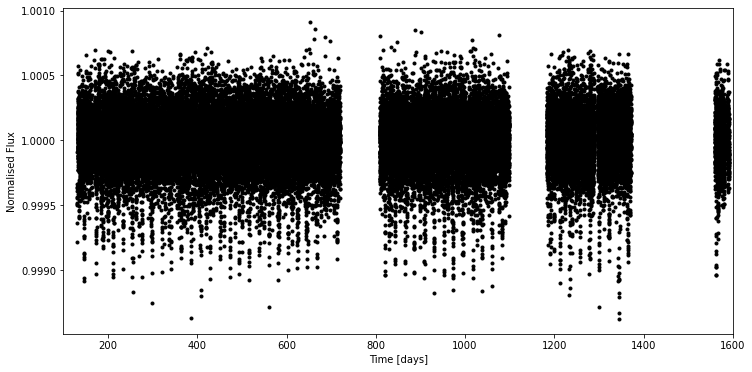

In [24]:
mytools2.full_lc(time_sort,flux_sort)

<div align="center"> <b>Figure 2: </b> Normalised lightcurve for the Kepler-4 Object obtained from the Kepler data archive. Flux measurements were collected from day 131 to day 1591.

In order to detect the exoplanets in the Kepler-4 system, data science techniques were applied to model the lightcurve and identify the exoplanet transits. The initial data contained 13 separate lightcurves, which covered different durations of the 1,460 day sampling period. To analyse the full lightcurve as a whole, functions were created and run on the lightcurve to normalise the data.

Initally, missing flux values were removed from the dataset, in order for the data science techniques to be run. Lightcurve smoothing filter, Savitzky-Golay, was utilised, from the SciPy Signal library, to perform the initial lightcurve smoothing and subsequent normalisation.  
The Savitsky-Golay filter works through fitting polynomicals locally to a set of data (Flannery et al 1992). The order of the polynomial and window length, (size of filter window), can specified in this filter function.
To produce the fully normalised lightcurve, as seen in figure 1, the Savitzky-Golay filter was applied, on the lightcurve with a window length value of 1001, and polynomial order of 3. Finally, to normalise the lightcurve, flux was divided by the filtered data produced from the Savitzky-Golay filter.

The lightcurve was filtered for random noise through removing outliers in the data. A mask was produced which removed any data points which were above 3 positive standard deviations from the normalised flux value equal to 1. This ensured that that the exoplanet transits remained in the lightcurve, however any outliers that were observed to be above this level were removed.

_2.12 Locating Planets using Lomb Scargle_

Reviewing the lightcurve, shown in figure 2, it is clear to see the exoplant transits, shown through the sharp drops in flux across the entire lightcurve.
In order to identify the periodicity of these transits Lomb-Scargle periodograms were created, available from the SciPy Signal library.

The Lomb-Scargle periodogram tool is an algorithm that can identify periodic signals in an unevenly sampled set of data (VanderPlas 2018). Lomb-Scargle periodograms created in this study can be seen in figure 3 and 4. The significance of the periodic measurement can be obtain through the strength of the power signal. Frequencies or periods with strong power values provide strong indication of a planetary transit at that frequency or period.

The Lomb-Scargle periodogram, shown in figure 3, was created taking 10,000 frequency values starting from the inverse of the typical time difference between flux measurements, ending at the frequency of the last flux measurement. Results in figure 3, suggests there are multiple planets in the system due to aliasing in the signal. A secondary, Lomb-Scargle was produced, shown in figure 4, to mitigate for this effect, to filter the signal enabling the transit periodicity to be observed.

<Figure size 432x288 with 0 Axes>

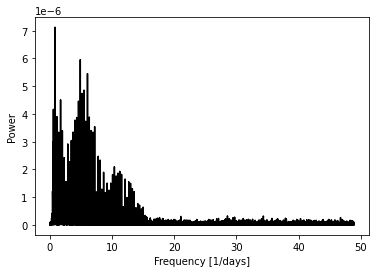

In [25]:
dif = time[1] - time[0] #difference between neigbouring  datapoints
lomb,freqs,t_2,t_dif= mytools.lomb1(np.min(time), dif, np.max(time), 10000, time, flux)

<div align="center"> <b>Figure 3: </b> First Lomb-Scargle periodogram computed from the normalised lightcurve. Strength of power relates to the indication that a planet can be found with the respective frequency.

<Figure size 432x288 with 0 Axes>

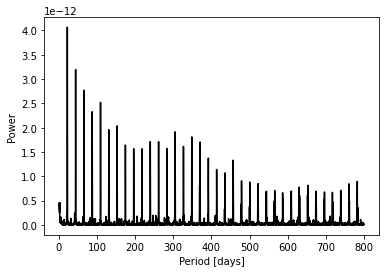

In [26]:
period,lombs2= mytools.lomb2(lomb,freqs)

<div align="center"> <b>Figure 4: </b> Second Lomb-Scargle periodogram computed from data shown in figure 3. Strength of power relates to the indication that a planet can be found with the respective orbital period

In [27]:
#Find peaks in lomb scargle 2
peaks = mytools.peak_find(lombs2, period)

The second Lomb-Scargle periodogram was created by taking 10,000 period measurements between day 1 and day 800. A 800 day sample length was taken as the entire sample time for the full lightcurve was ~ 1600 days, which would allow for at least 2 transits to be observed, for a planet with a orbital period of 800 days, assuming the first transit occurs at day 0. The associated periodogram can be found in figure 4. The strength of the power signal for each associated period indicates the strength of the periodicity of the data, thus the likelihood of an exoplanet with the associated orbital period.

In figure 4, the period at which notable peaks occurred were found using the created function, mytools.peak_find. Each peak was investigated to understand whether these corresponded to exoplanet transits. This was determined through running an iterative function, mytools.find_period, to observe the nature of a folded lightcurve, at each period value. It was found that peaks corresponding to periods of ∼13 days, ∼22 days, ∼32 days, ∼41 days were due to exoplanet transits.

A limitation of the Lomb-Scargle plots is that one may miss an exoplanet transit if the strength of the power is not significant enough. An additional limitation is that the peaks at associated period do not determine the exact exoplanet period. To mitigate for this, an additional function called Mytools.find_period, was created and run to find the exact value of exoplanet orbital period, see appendix. The function was created to iterate through the following periods of ∼13 days, ∼22 days, ∼32 days, ∼41 days to determine their precise value.
Four exoplanets were successful identified and were measured to have periods corresponding to, 13.1754 days, 21.7760 days, 31.784 days and 41.020 days.


_2.13 Curve Fittings the Folded Light Curves_

Lightcurve folding was applied to retrieve a detailed view of the individual exoplanet transits, at periods identified earlier. The lightcurve folding was achieved through joining a sequence of flux arrays along the phase axis.The results from the lightcurve folding can be seen in figure 5, where the black data points correspond to the folded data.

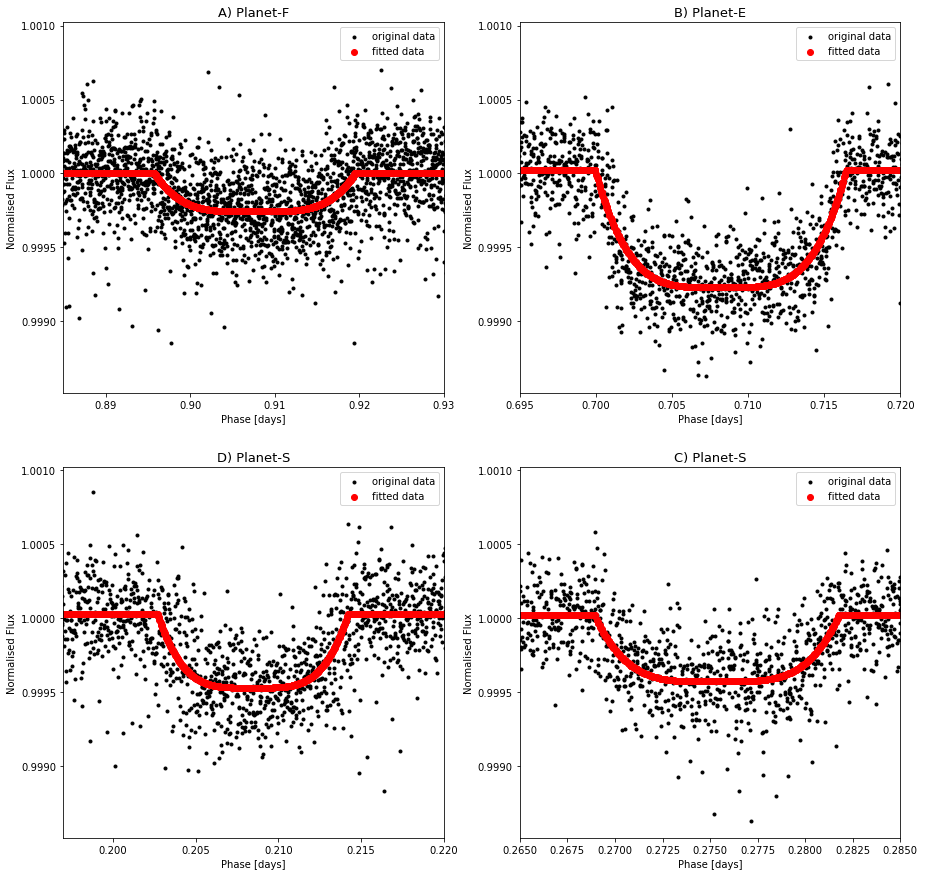

In [28]:
mytools2.folded(phase_f, flux_f,ph_f, func_f, phase_e, flux_e, ph_e, func_e, phase_l, flux_l, ph_l, func_l,phase_s, flux_s, ph_s, func_s)

<div align="center"> <b>Figure 5 </b>: Folded lightcurves for transiting exoplanets, Planet-F, Planet-E, Planet-L and Planet-S, at periods of 13.175 days, 21.776 days, 31.784 days and 41.020 days.

A fitted lightcurve was applied to the folded data, to identify key information about the exoplanet transits. The lightcurve was fitted using a created function, mytools2.quartic_transit, which describes the full shape of a transit. To optimize this function, curve fitting was applied. Curve fitting allows one to identify the optimal parameters, that best describes a set of data, for an applied function. To produce the fitted transit curve, as shown in figure 5, Curve_Fit, available from the SciPy Optimize library was used. The Curve_Fit function applied a non-linear least squares to fit to the quartic transit function, which outputted the optimized parameters. The optimized parameters were inputted back into the quartic function to produce the fitted lightcurves, as seen in figure 5.


_2.14 Additional Calculations to Determine Planetary Radius, Semi-Major Axis and Associated Errors_

Additional characteristics about the detected exoplanets were determined through the analysis of the exoplanet lightcurve. Planetary radius was determined through obtaining the transit depth, from the optimized parameters found during the curve fitting, taking $R_{star}$ to be (1.66 ± 0.07) R☉ and through applying equation 1. The results for exoplanet radius can be found in table 1.

Semi-major axis was found using estimated orbital period, equation 2, and taking $M_{star}$ to be (1.1 ± 0.1) M☉ and planetary mass to be (0.39) M🜨, (4.1) M🜨, (5.5) M🜨, (9.6) M🜨 for Planet-F, Planet-E, Planet-L, and Planet-S, respectively. The results for semi-major axis can be found in table 1.

_2.15 Error Calculations_

_Finding Error in Period using Residuals Method_ 

Residual inspection was used to determine error in exoplanet period. Residuals provide a measure of how well our observed data fits our estimated results. The period residuals were found through locating each exoplanet transit in the full lightcurve, shown in figure 2. The time difference between neighbouring transits was found to determine observed period, which was then subtracted from the estimated period found from the lightcurve folding. The calculated residuals against nth transit found, are shown in figure 6. 

Residual standard deviation, $\sigma_R $, was obtained using the following equation,

$$ \sigma_R  = \sqrt{\frac{\Sigma (V - V_{est})^2}{n-2}}, \tag{4}$$ 

where $V$ is the observed period, $V_{est}$ is the estimated period and $n$ is the number of data points.

Uncertainty in period, $\sigma_{P}$, was found by dividing $\sigma_{R}$ by the square root of the sum of the squared index values, $S_{nn}$,

$$  \sigma_{P} = \frac{\sigma_{R}}{\sqrt{S_{nn}}}, \tag{5}$$

where $S_{nn}$ can be represented as,

$$ S_{nn} = \Sigma (n_{i} - \bar{n})^2, \tag{6} $$

where $n_{i}$ is the ith transit detected and $\bar{n}$ is the average number of data points . Estimated period and the associated errors can be found in table 1.

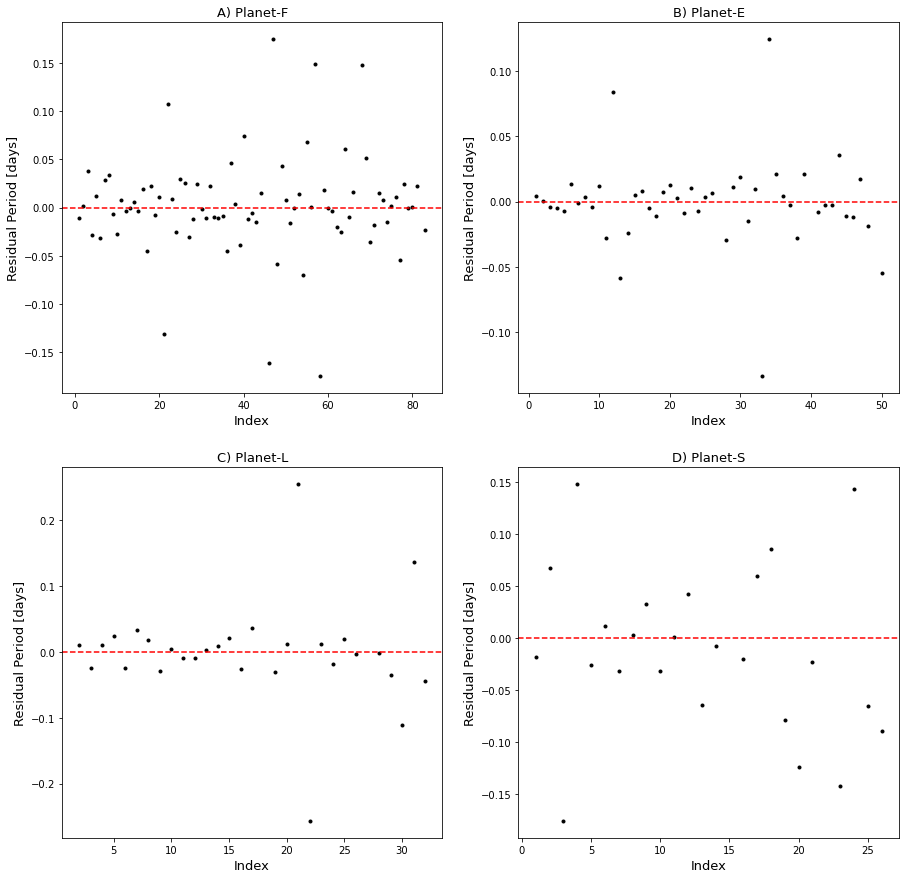

In [29]:
mytools2.residuals(x_13, y_13, x_21, y_21, x_31, y_31, x_41, y_41)

<div align="center"> <b>Figure 6 </b>: Plot of period residuals (observed period - estimated period) against index (the nth transit located in the lightcurve) to represent the magnitude that the observed period deviates from the estimated value. 

_Finding Error in Exoplanet Radius, Semi-Major Axis, Planetary Density_

Uncertainties in planetary radius, semi-major axis and density were determined using established equations of combining errors as shown in the Appendix. Error in semi-major axis was quoted by combining the upper and lower limits of uncertainty as both upper and lower limits were equivalent to 3 decimal places.

_2.16 Summary of Results_

In [30]:
exoplanet

,Planet Name,Orbital Period [days],Orbital Period Error [days],Semi-Major Axis [Au],Semi-Major Axis Error [Au],Mass [M🜨],Mass Error [M🜨],Planet Radius [R🜨],Planet Radius Error [R🜨],Density [kg/m^3],Density Error [kg/m^3]
0,Planet-F,13.1754,+/- 0.0002,0.113,+/- 0.003,0.39,+1.24 - 0.32,2.92,+/- 0.14,86.40,+ 274.98 -71.97
1,Planet-E,21.7760,+/- 0.0004,0.158,+/- 0.005,4.10,+1.7 -2.0,5.11,+/- 0.22,169.47,+74.60 -85.52
2,Planet-L,31.7840,+/- 0.0016,0.203,+/- 0.006,5.50,+1.2 -1.1,3.83,+/- 0.17,537.64,+102.44 -96.30
3,Planet-S,41.0200,+/- 0.0021,0.240,+/- 0.007,9.60,+1.7 -1.8,4.05,+/-0.18,798.08,+75.55 -78.42


<div align="center"> <b> Table 1: </b> Table of detected exoplanets found from data received from the Kepler-4 object and their associated derived planetary features.

***
### 3. Discussion

#### _3.1 Results Analysis_

A summary of the results obtained from the lightcurve modelling process and additional calculations can be found in table 1. Four exoplanets were detected in the Kepler-4 system through transit photometry. Exoplanets named, Planet-F, Planet-E, Planet-L and Planet-S were found to have periods of (13.1754 ± 0.0002) days, (21.7760 ± 0.0004) days, (31.784 ± 0.0016) days and (41.020 ± 0.0021) days, respectively. Through analysing the depth of the transits and using equation 1, it was found that Planet-F, Planet-E, Planet-L and Planet-S, had exoplanet radii of (2.92 ± 0.14) R🜨 , (5.11 ± 0.22) R🜨, (3.83 ± 0.17) R🜨 and (4.05 ± 0.18) R🜨, respectively. This suggests that Planet-F has an Earth-like radius and Planet-E, Planet-L and Planet-S can be described as Neptune-like planets due to their comparable size to Neptune.

Additional planetary characteristics were obtained utilising additional information provided about the solar system. Taking the mass of the Kepler-4 object to be (1.1 ± 0.1) M☉ and associated planetary masses, as shown in table 1, semi-major axis was determined using equation 2. It was found that for Planet-F, Planet-E, Planet-L and Planet-S, semi-major axis was found to be (0.113 ± 0.003) Au, (0.158 ± 0.005) Au, (0.203 ± 0.006) Au and (0.240 ± 0.007) Au, respectively. This suggests that all the discovered planets have orbital lengths shorter than Earth which is consistent with their relatively short orbital periods compared to Earth also.

Planetary density was determined using the assumption that mass is evenly distributed across the sphere and that planetary radius is constant. With these assumptions a generalised formula for planetary density $\rho$ was found to be, 

$$ \rho = \frac{M_{planet}}{\frac{4}{3}\pi R^3_{planet}}. \tag{7}$$ 

Planetary density was found to be (86.40 +274.98,-71.97) kgm<sup>-3</sup> , (169.47 +74.60,-85.52) kgm<sup>-3</sup>, (400.78 +102.44,-96.30) kgm<sup>-3</sup> and (340.85 +75.55,-78.42) kgm<sup>-3</sup>, for planets Planet-F, Planet-E, Planet-L and Planet-S, respectively. In comparison the density of Earth is 5515 kgm<sup>-3</sup> and the density of Jupiter is 1326 kgm<sup>-3</sup> (NASA Goddard Space Flight Center 2021). As observed, the exoplanet densities are approximately 60 to 14 times smaller than the density of Earth and 15 to 3 times smaller than the density of Jupiter. Further analysis into planetary density is included below.

#### _3.2 Comparison with Exoplanet Population_

The four exoplanets discovered to be orbiting the Kepler-4 object were compared to the entire exoplanet population obtained from the NASA Exoplanet Archive (NASA Exoplanet Archive 2021), as shown in figure 7 and 8. 

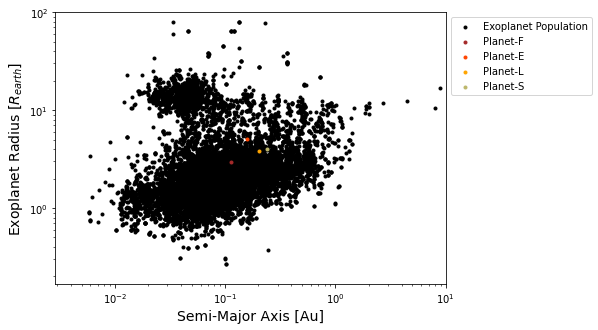

In [31]:
mytools2.len_rad(orbital_length,planet_radius, nasa['pl_rade'],nasa['pl_orbsmax'])

<div align="center"> <b> Figure 7: </b> Planetary radius and semi-major axis distribution of entire exoplanet population compared to detected Kepler-4 exoplanets on a logarithmic scale.

Figure 7, shows that the Kepler-4 exoplanets are positioned within planetary radii and semi-major axis values typical of previously detected exoplanets. Suggesting that the Kepler-4 exoplanets are not outliers to the current established exoplanet population. Information on where the Kepler-4 exoplanets sit within the radius versus semi-major axis plot, provides an indication on how the exoplanets were formed. The positioning of the exoplanets suggests that they may have been formed through core accretion, due to their orbital lengths being comparable to earth-like orbits and their subsequent non massive size.

Inspection of figure 7, suggests that the Kepler-4 exoplanet population has planetary radii greater than the radius of the Earth, yet radii lower than Jupiter-like planets. Additionally, the Kepler-4 exoplanets exhibit orbital lengths between 5 to 10 times smaller than the orbital length of Earth. In summary, the Kepler-4 exoplanets are greater in size than Earth but have orbits much closer to their host star than the Earth has with the Sun. 

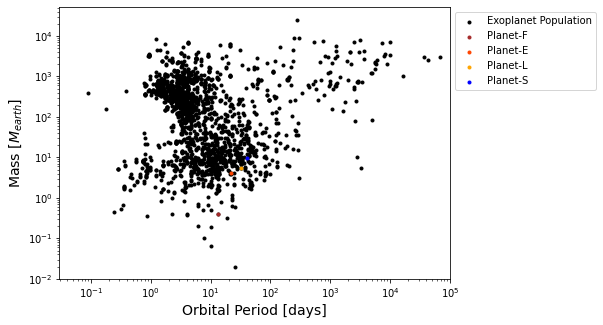

In [32]:
mytools2.mas_per(planet_mass, planet_period, nasa['pl_masse'], nasa['pl_orbper'])

<div align="center"> <b> Figure 8: </b> Planetary mass and orbital period distribution of entire exoplanet population compared to detected Kepler-4 exoplanets on a logarithmic scale.

The characteristics of the discovered exoplanets have been visualised in figure 8. When plotted on the mass - period axis, it is clear that the detected exoplanets have masses and periods typical to detected exoplanets. However, the mass and period relation for the Kepler-4 exoplanets exhibit unique properties which is demonstrated by their position within the plot. The exoplanets sit in less populated regions of the graph. 

When compared against the same plot in figure 9, the Kepler-4 exoplanets can be categorised by planet type. Through plot comparison it can be concluded that Planet-F would sit within the Rocky-Planets region. Planet-E and Planet-L sit within the super-Earth region and Planet-S sits on the cusp of warm-Neptunes. This provides indication of the composition of the planets. Super-Earths are planets which are larger than earth yet lighter than ice giants (Trigo-Rodriguez et al 2013), and can have a composition of rock or gas. Warm-Neptunes are planets that have masses similar to Neptune yet orbital lengths much smaller with subsequent warmer atmospheres (Baraffe et al 2005).

![](image2.jpg)

<div align="center"> <b> Figure 9: </b> Planetary mass and orbital period distribution of entire exoplanet population. Classification of USP (ultra-short period) planets, super-Earths, warm-Neptunes, Hot Jupiter, Classical giants and Rocky Planets based on mass and orbital period relationship. Sourced from (Xiu-min & Jiang-hui 2020)

****
#### _3.3 Habitability_

The detected exoplanets were analysed to assess the potential habitability. In order to assess the habitable feature of these planets, habitable zone, exoplanet density, escape velocity and already established planetary characteristics were considered.

_3.31 Habitable Zone_

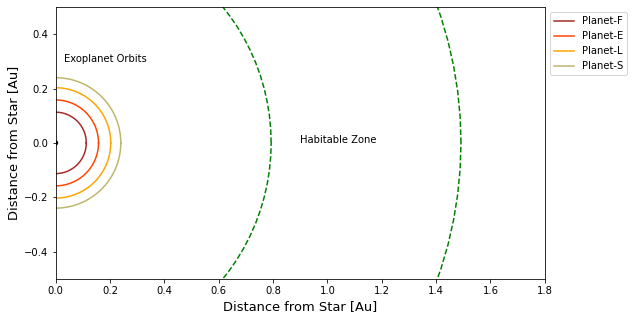

In [33]:
mytools2.hab_plot(uplim, lolim)

<div align="center"> <b> Figure 10: </b> Illustration of habitable zone around the Kepler-4 object in relation to the orbital lengths of exoplanets F, L , E and S. The upper bound of habitable zone is equal to 1.49 Au and lower bound is equal to 0.79 Au.

Habitable zone was calculated using equation 3, taking the upper limits and lower limits of temperature to be 373K and 273K, respectively. This resulted in a an upper limit for habitable zone to be 1.49 Au away from Kepler-4 object and a lower limit 0.79 Au away from the star, which can be visualised in figure 10. 

As observed in figure 10, none of the detected exoplanets lie within this habitable zone, which suggests that liquid water would not be maintained nor sustained in the respective detected exoplanets. This result strongly suggests that the detected exoplanets would have a low probability to, firstly be able to sustain and maintain life, but also to have inhabitants on the planet currently.

Although, the habitable zone lies at much larger distance away from the orbital lengths of the Kepler-4 object, it is still important to consider the limitations to estimating habitable zone in this manner. This habitable zone calculation does not take into account that the actual planetary temperature depends on a number of planetary characteristics, such albedo and the greenhouse gas effect. Information about an planet's albedo indicates the degree at which the planet reflects incoming radiation and therefore the temperature of the planetary surface. The lower the albedo the greater the amount of the incoming radiation that is absorbed by the planet. Greenhouse effect has a secondary effect on the planetary temperature. Greenhouse gases trap heat within the planetary atmosphere, creating an increase in temperature. The effect of considering atmospheres rich in carbon dioxide would produce an increase in the upper limit of habitable zone as expected planetary temperature would be sufficient enough to maintain liquid water.

_3.32 Exoplanet Density_

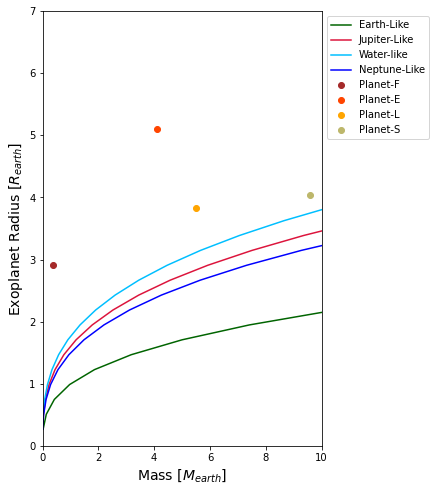

In [34]:
mytools2.rad_mas2(planet_mass,planet_radius, earth_val, jup_val, water_val, nep_val)

<div align="center"> <b> Figure 11: </b> Representation of density - mass and density - radius  relation for Earth-like, Jupiter-like , Water-like and Neptune-like planets compared to detected exoplanets orbiting the Kepler-4 object.

Following density calculations analysed in section _3.1 Result Analysis_ , density can be analysed through a comparison to densities known for planets in our solar system such as, Jupiter, Earth, Neptune and substance, water. The graphical representation of the density-mass relation and density-radius relation for these densities can provide us with further information about the likely composition of the planet and the nature of the planetary surface. For example, a planet that was positioned on the water-like density curve would represent a homogeneous water-like planet. This is useful to understand whether a planet is habitable by determining if the planet may be rocky in composition.

As figure 11 suggests, the Kepler-4 exoplanets are positioned above all density curves, suggesting that the exoplanets have densities far lower than that of the following planets and water, alike. Densities this low suggest that the exoplanets are composed of lighter elements in the atmosphere with relatively small rocky or metal cores, similar to Saturn. Further analysis into planetary escape velocity and bond albedo can be conducted to further understand the nature of the exoplanet atmosphere and either confirm or disprove assumptions made from the estimated exoplanet densities.

Although, figure 11 suggests the exoplanets exhibit densities lower than that of Jupiter, Earth, Neptune and water. Limitations in our assumptions play a key factor in understanding the true atmosphere and composition of the planet. A key assumption in this analysis is that the mass is distributed evenly across this radius, negating the fact that the planet may have a very dense core and expansive low density atmosphere. The affect of these assumptions results in an incorrect conclusion of the exoplanet composition as it assumes homogeneous planet, as exhibited. 

_3.33 Escape Velocity_

Escape velocity, $v_{esc}$, for each exoplanet was determined by considering the exoplanet radius and mass,

$$ v_{esc} = \sqrt{\frac{2G M_{planet}}{R_{planet}}} \tag{8},  $$

where all variables have been introduced earlier in the introduction. The results can be seen in table 2.

In [35]:
esc

,Planet Name,Escape Velocity [m/s],Escape Velocity Error [m/s],Vrms CO2 [m/s],Vrms H20 [m/s]
0,Planet-F,4087,"+6498, -1680",750,1171
1,Planet-E,10017,"+2088, -2543",689,1076
2,Planet-L,13392,"+1490, -1372",647,1011
3,Planet-S,17221,"+1572, -1659",620,969


<div align="center"> <b> Table 2: </b> Table of calculated escape velocities, found using equation 8, at distances of exoplanet radii from the centre of the planet. Compared to root mean squared values for carbon dioxide and water vapour at temperatures determined at distances equal to orbital lengths for corresponding exoplanets.

Escape velocity was compared to the root mean squared speeds of greenhouse gases, H<sub>2</sub>0 and C0<sub>2</sub>. Root mean squared speed ,$v_{rms}$, was determined by taking temperature to be $T_{eff}$ at distances equal to the orbital lengths of the exoplanet orbits,

$$ v_{rms} = \sqrt{\frac {3 R_{g} T_{eff}}{m}}, \tag{9} $$

 where $m$ is the molar mass of the molecule, $R_{g}$ is the gas constant. 
 
 $T_{eff}$ was considered in this manner to understand the typical average speeds of these molecules at the surface of the exoplanets.

Escape velocity was compared to these values to understand whether water vapour or carbon dioxide could be present on the  surfaces, giving an insight into the whether liquid water could be sustained on the planetary surface and whether atmospheric greenhouse gases could provide additional surface warming (Ramirez & Kaltenegger 2018). Reviewing the results in table 2, it can be seen that both average speeds for water vapour and carbon dioxide are lower than typical escape velocities of the exoplanets. This suggests that both liquid water and carbon dixoide could be present in the planetary atmospheres, assuming their average velocities do not exceed the escape velocity.

_3.34 Exoplanet Characteristics_

As analysed in section _3.2 Comparison with Exoplanet Population_ , it was found that Planet-F had a period-mass relationship consistent to a rocky planet, Planet-E and Planet-L are super-Earths and Planet-S sits between warm-Neptunes and super-Earths regions. Despite Planet-F being categorized in this region, it has been suggested that planets with radii greater than 1.5R🜨 have a reduced chance of being predominately rocky in nature (Kopparapu & Wolf & Meadows 2019). Planetary radius above this limit would be consistent of planets with a rocky core yet thick atmosphere resulting in less habitable environments (Kopparapu & Wolf & Meadows 2019). As a result, analysis of planetary radii and period-mass relationship suggest that no exoplanets in the Kepler-4 system would be candidates of exoplanet habitability.

The densities found suggested that the exoplanets were composed of mainly low mass atmospheres due to their relatively low densities. Analysis into the escape velocity for each exoplanet suggested that water vapour and CO<sub>2</sub> could be maintained in these atmospheres, if these substances were found to be present. However, due to all the Kepler-4 exoplanets being situated far from the limits of habitable zone, it can be further concluded that none of the exoplanets would be able to maintain nor sustain life.

****
#### _3.4 Future Analysis_

_3.41 Stellar Luminosity_

In this study, only planet characteristics have been considered to assess the habitability the Kepler-4 exoplanets. However, there are a variety of stellar features that have an impact of the habitability of planets within the stellar system. 
Stellar luminosity is important to consider when determining the planetary habitability. It not only effects the energy that an exoplanet will receive but also affects the location of the habitable zone (Rushby et al 2013). Stellar luminosity evolution describes how a star’s luminosity changes over time. Considering main sequence stars, the pre-main sequence stage is dictated by the stellar mass. Low-mass stars experience prolonged time in this phase resulting in a gradual luminosity evolution. This can be compared to higher mass main sequence stars which progress quickly through this pre-main sequence stage. This typically creates a rapidly evolving emission of radiation received by the planet, resulting in orbiting exoplanets losing their atmospheres and water content through evaporation (Kopparapu at al 2018). Thus, effecting the planet’s future potential of creating and sustaining life. To understand the nature of stellar luminosity evolution, one can use pre-established models built on already known luminosities and its relationship to stellar mass and age.

***
### 4. Summary

-	Transit photometry was performed on data containing flux measurements from the Kepler-4 object.
-	Transit analysis was achieved through normalisation of the Kepler-4 lightcurve and investigation of the periodicity of transits.
-	Lightcurve analysis discovered the presence of 4 exoplanets in the Kepler-4 system.
-	The orbital period was estimated to be (13.1754 ±0.0002) days, (21.7760 ±0.0004) days, (31.784 ±0.0016) days and (41.023 ±0.0021) days for Planet-F, Planet-E, Planet-L and Planet-S, respectively.
-	Derived from lightcurve analysis, the associated planetary radii were determined to be (2.92 ± 0.14) R🜨, (5.11 ± 0.22) R🜨, (3.83 ± 0.17) R🜨, (4.05 ± 0.18) R🜨, for Planet-F, Planet-E, Planet-L and Planet-S, respectively.
-	The detected exoplanets were found to have consistent, mass, radius, orbital length and orbital period of the current exoplanet population. Suggesting the planets are not outliers.
-	When a comparison between detected exoplanets to entire exoplanet population was performed, it was found that Planet-F had a mass-period relationship consistent to that of Rocky Planets.
-	Planet-E and Planet-L had mass-period relations consistent of super-Earth-like planets and Planet-S consistent of warm-Neptunes.
-	Further analysis into planetary characteristics were performed to assess the habitability of the planets.
-	An investigation into habitable zone, concluded that no exoplanets were potential candidates despite having escape velocities consistent to sustaining and maintaining water vapour and carbon dioxide.


***

### 5. Appendix

#### _5.1 Uncertainty Calculations_

Uncertainty was found by using equations of combining errors. 

$$ A = B + C   \rightarrow \ \sigma_A = \sqrt{\sigma_B^2 + \sigma_C^2}, \tag{10} $$

$$ A = B * C   \rightarrow\ 
\  \frac{\sigma_A}{A} = \sqrt{\left(\frac{\sigma_B}{B}\right)^2 + \left(\frac{\sigma_C}{C}\right)^2}, \tag{11} $$

$$ A= B^{ C} \rightarrow  \ \frac{\sigma_A}{A}= [C  (\frac{\sigma_B}{B})],  \tag{12} $$

#### _5.2 Function which iterated through estimated periods to determine exact period_
A function was created to iterate through potential periods to determine which period produced the clearest lightcurve fold. The example below shows the iteration conducted for the planet found to have a period of approximately 13 days.

[13.0476697665, 13.054635463, 13.0616011595, 13.068566856, 13.0755325525, 13.082498249, 13.0894639455, 13.096429642, 13.1033953385, 13.110361035, 13.1173267315, 13.124292428, 13.1312581245, 13.138223821, 13.1451895175, 13.152155214, 13.1591209105, 13.166086607, 13.1730523035, 13.180018]


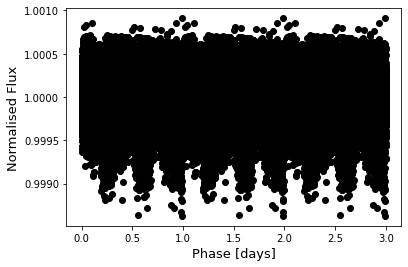

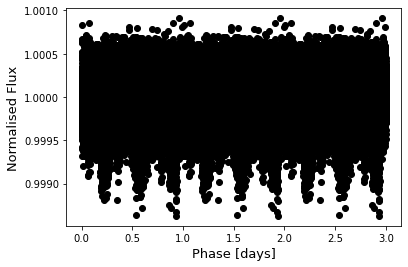

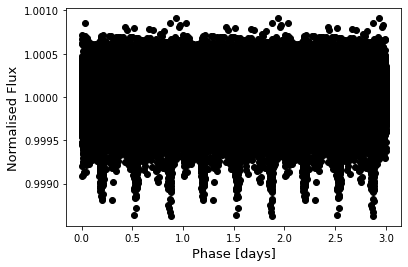

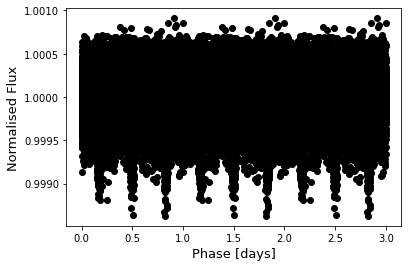

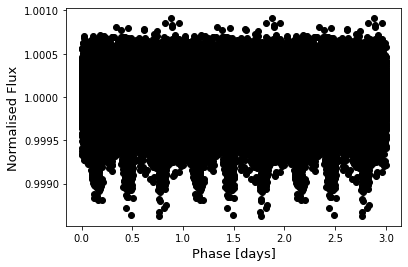

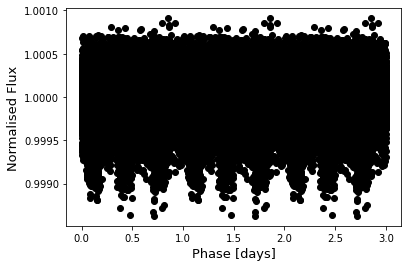

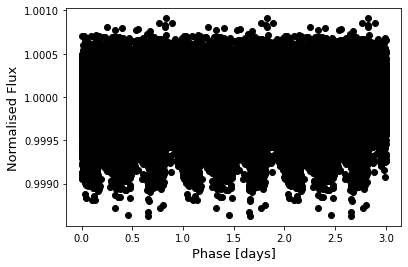

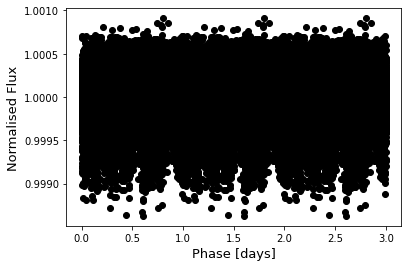

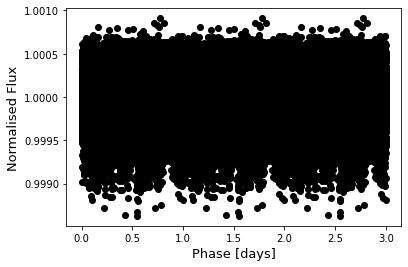

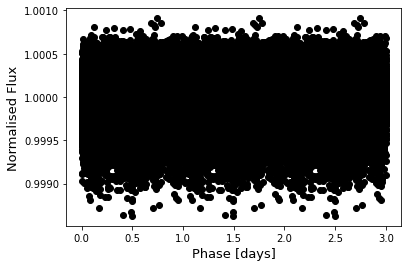

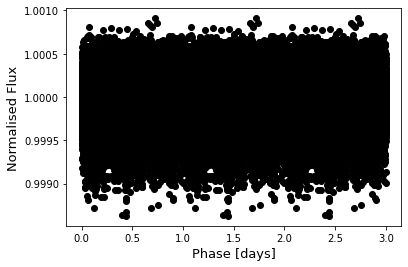

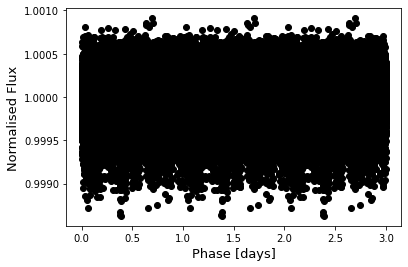

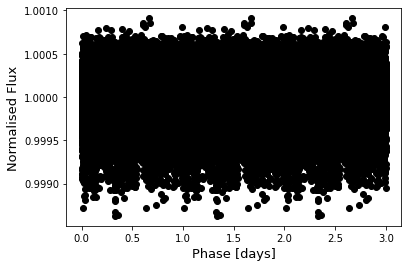

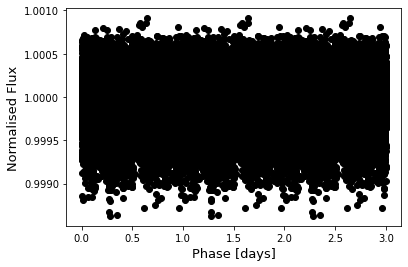

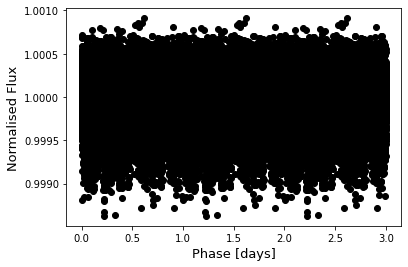

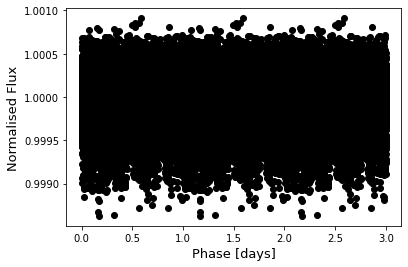

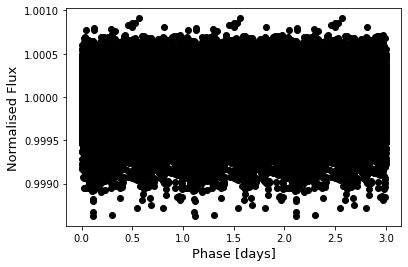

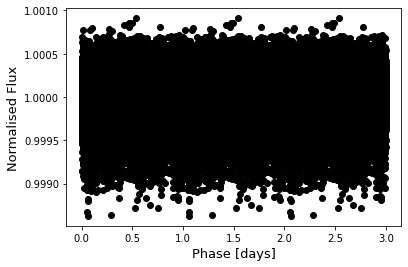

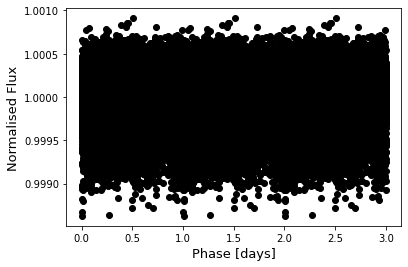

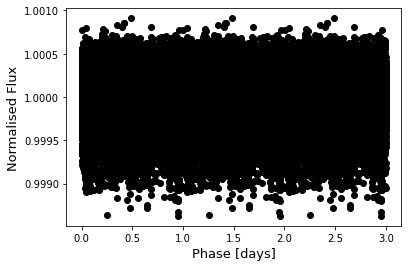

In [36]:
#code to find exact periods
test_period= mytools.find_period(13.180018, 13.04070407, 20)
print(test_period)

for i in range(len(test_period)):
    phase_t, flux_t, error_t= mytools.fold_lc(time, flux, error, test_period[i])
    plt.figure()
    plt.scatter(phase_t,flux_t, c='black')
    plt.xlabel('Phase [days]')
    plt.ylabel('Normalised Flux')

<div align="center"> <b> Figure 12: </b> Folded lightcurve for period varying from (13.1800018 - 13.04070407) days to determine the exact period of the exoplanet transit. The lightcurve will the most distinct transit depths were further analysed and taken to be the estimated period.

***
### 6. References:



- Seckback & de Vera, 2013, Habitability of Other Planets and Satellites, 28, 06 
- Yaqoob, 2011, Exoplanets and Alien Solar Systems, 1, 56
- Flannery et al, 1992, Numerical Recipes in C: The Art of Scientific Computing, 2, 650
- VanderPlas, 2018, Understanding the Lomb-Scargle Periodogram,1, 236
- Xiu-min & Jiang-hui, 2020 , Chinese Astronomy and Astrophysics, 44, 285
- Ramirez & Kaltenegger, 2018, A Methane Extension to the Classical Habitable Zone,858,2
- Trigo-Rodriguez et al, 2013, The Early Evolution of the Atmospheres of Terrestrial Planets, 35, 3
- Baraffe et al, 2005, Hot-Jupiters and hot-Neptunes: a common origin?,1, 1
- Kopparapu et al, 2018, Characterizing Exoplanet Habitability,1,9
- Rushby et al, 2013, Habitable zone lifetimes of exoplanets around main sequence stars, 1, 1
- NASA, 2021, What is an Exoplanet? Available from: https://exoplanets.nasa.gov/what-is-an-exoplanet/overview/ [Accessed 15 December 2021]
- NASA Exoplanet Archive, 2021. Available from: https://exoplanets.nasa.gov/what-is-an-exoplanet/overview/ [Accessed 15 December 2021]
- NASA Goddard Space Flight Center, 2021.Available from: https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html [Accessed 15 December 2021]
- NASA Science, 2021 .Available from: https://solarsystem.nasa.gov/resources/686/solar-system-sizes/. [Accessed 15 December 2021]

***
### 7. Acknowledgments:
I wish to acknowledge the function, find_peaks, available from the SciPy Signal library for assisting with exoplanet period discovery.